# Bulk short read RNA-seq analysis with R

This notebook follows Chapters 1-5 of [R for Data Science](https://r4ds.had.co.nz/index.html).


## [Introduction](https://r4ds.had.co.nz/introduction.html#what-you-will-learn)
While some biologists get by with using software like Excel and GraphPad Prism to process data and make figures, even a basic understanding of coding in R opens up the possibility to make any kind of plot you want with data so large that Excel would crash trying to open it, let alone perform statistical analysis. 

The general data science workflow of Import --> Tidy --> Transfom --> Visualize --> Model --> Communicate holds true for bioinformatics as well. This notebook introduces the `tidyverse` package to tidy and transform data. It is a collection of packages including `tidyr` and `dplyr` (which have functions similar to those in the `pandas` Python package), and `ggplot2` to visualize data, similar to Python's `seaborn` (but arguably better). 

## [Prerequisites](https://r4ds.had.co.nz/introduction.html#prerequisites)
Disregard this section - after you login through UCI's JupyterHub, you are ready to go! If you want to continue using R after this summer, I recommend reading through it. 

## Load packages

In [2]:
library(tidyverse)

Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



## Investigate data

The `head()` function is just like `head` in Linux, except it outputs the first 6 lines rather than 10. Like the command line arguments, most functions also have options. For example, output the first 10 rows with `head(counts, 10)`. Jupyter also indicates the data "class", in this case a tibble `data.frame`, similar to a Python pandas data frame. "Tibble" is just a modernized `data.frame` that is specific to the `tidyverse` package. Other common bioinformatics data classes in R are the numeric `matrix` and `dgCMatrix`, or sparse matrix. Sometimes we will have to convert our `data.frame` to a `matrix` depending on the analysis. The main difference between a `data.frame` and a `matrix` is that a `data.frame` can have non-numeric column information.

The `dim()` function outputs the dimensions of the data in rows by columns.

Let's look at some car data that is included in the `tidyverse` package.

In [4]:
head(mpg)
dim(mpg)
class(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


[1] 234  11

[1] "tbl_df"     "tbl"        "data.frame"

### Questions
1. How many rows are in the data frame?
2. How many columns are in the data frame?

## Manipulating data

Data.frame variables can be manipulated by functions like `head()`, but also directly using brackets `[]` and the dollar sign `$` for column names.
`:` operator indicates a sequence. `c()` function combines multiple values in a vector, which is like a list in Python.

In [6]:
mpg[1,2] # 1st row, 2nd column
1:3
mpg[1:3,1] # rows 1 to 3, 1st column
head(mpg$manufacturer) # first 6 lines of column named "manufacturer"
c(1,3,4) 
mpg[1:2,c(1,3,4)] # rows 1 to 2, columns 1, 3, and 4


model
<chr>
a4


[1] 1 2 3

manufacturer
<chr>
audi
audi
audi


[1] "audi" "audi" "audi" "audi" "audi" "audi"

[1] 1 3 4

manufacturer,displ,year
<chr>,<dbl>,<int>
audi,1.8,1999
audi,1.8,1999


## Data visualization: [creating a ggplot](https://r4ds.had.co.nz/data-visualisation.html#creating-a-ggplot)

Let's start using `ggplot()` by visualizing the relationship between a car's engine size and its highway fuel efficiency.

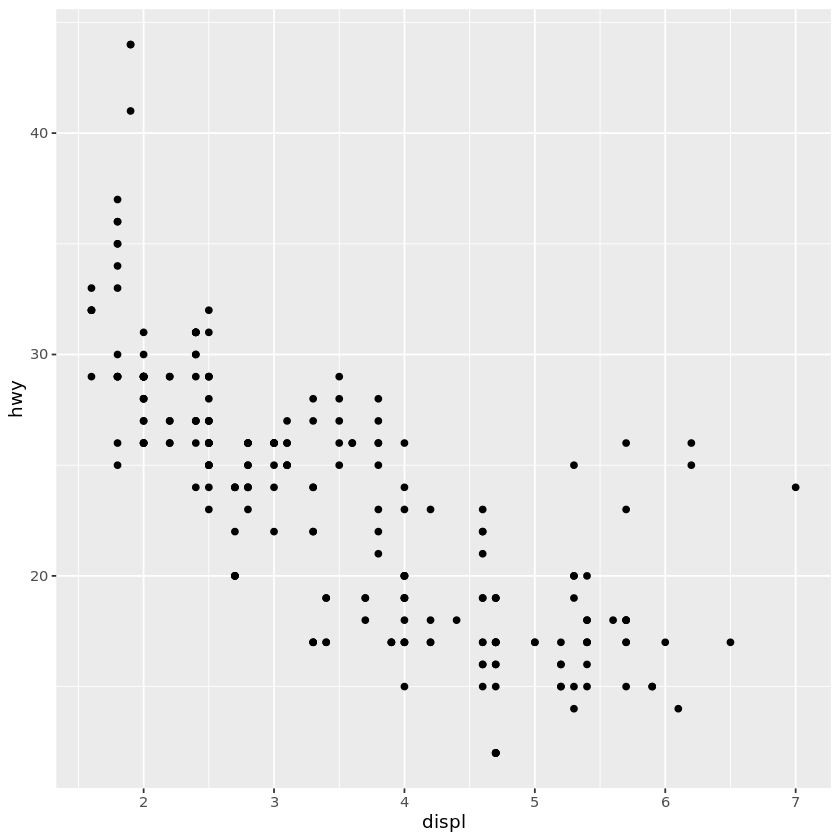

In [7]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

There are 3 key components to a ggplot: data, aesthetics (aes), and geometry (geom).

In [ ]:
ggplot(mpg) # just the data component

In [ ]:
ggplot(mpg) + geom_point() # data and geometry, but no aesthetics -- error!

In [ ]:
ggplot(mpg) + geom_point(aes(displ, hwy)) # also works without specifying data = , mapping = , x = , y = 

In [ ]:
?ggplot # view documentation

## Aesthetic mappings
Add a third variable to the plot using color. Note that `color = ` is set inside the `aes()` function. Remember that "class" is a column name in the mpg data frame.

In [14]:
head(mpg)

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact


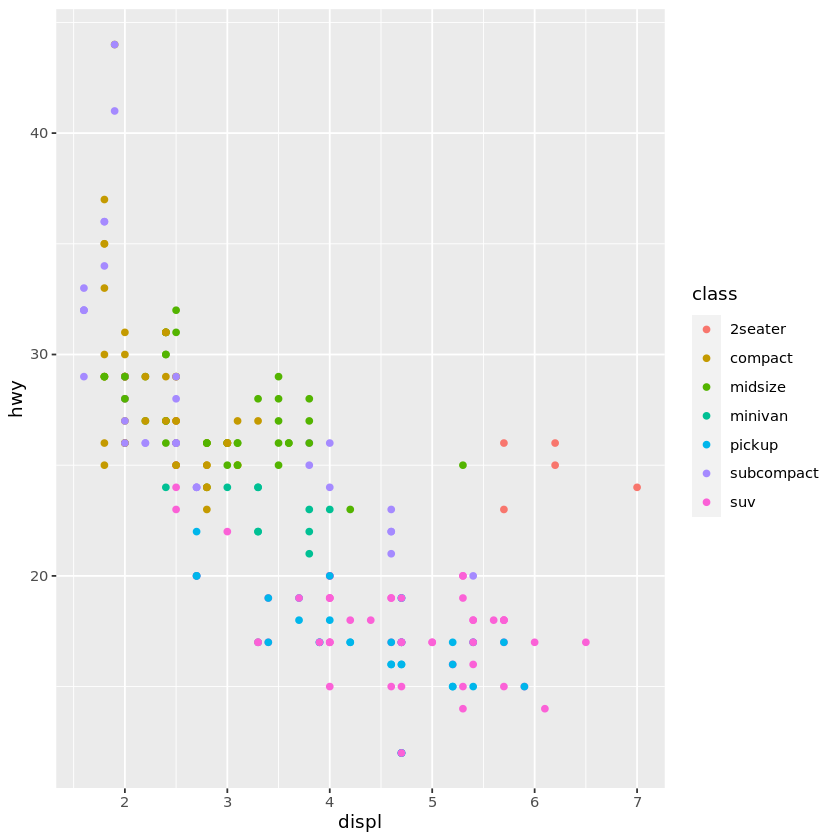

In [11]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, color = class))

I think the above plot looks very nice! There aren't too many classes of cars so the number of colors isn't overwhelming (although ggplot's default color palette leaves more to be desired). You can see that the SUVs and subcompact cars have a large engine size but low highway efficiency.

Rather than using color, we could have mapped the class of car to the size of the point. Does this make the plot more or less interpretable? The warning gives a clue...

Warning message:
"Using size for a discrete variable is not advised."


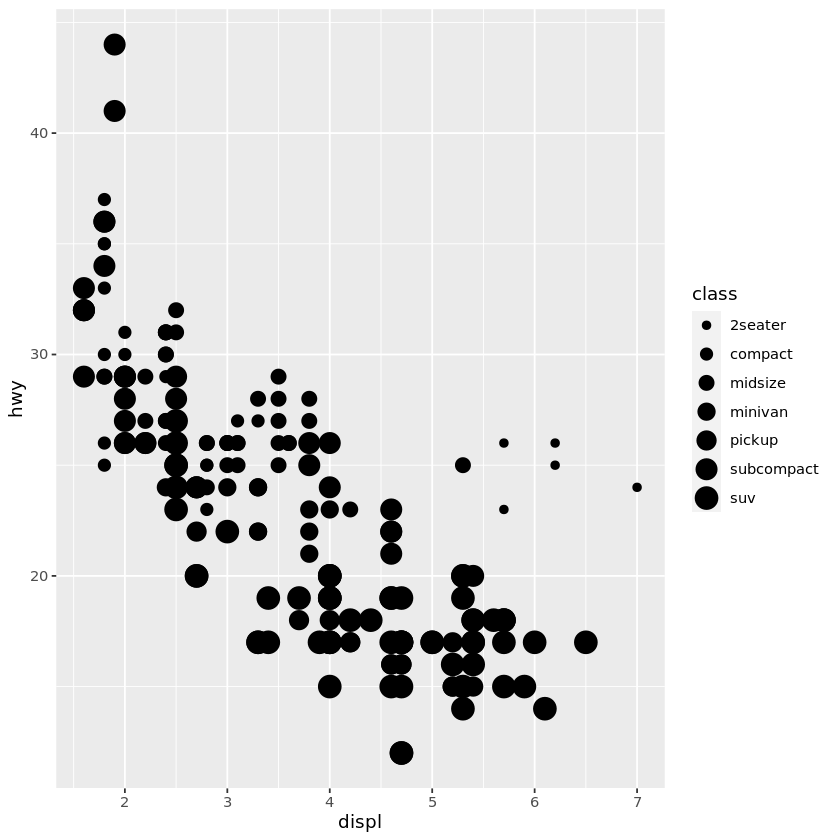

In [13]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, size = class))
#> Warning: Using size for a discrete variable is not advised.

Mapping class to the *alpha* aesthetic, which controls the transparency of the points, or to the shape aesthetic, which controls the shape of the points:

Warning message:
"Using alpha for a discrete variable is not advised."
Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."
Warning message:
"Removed 62 rows containing missing values (geom_point)."


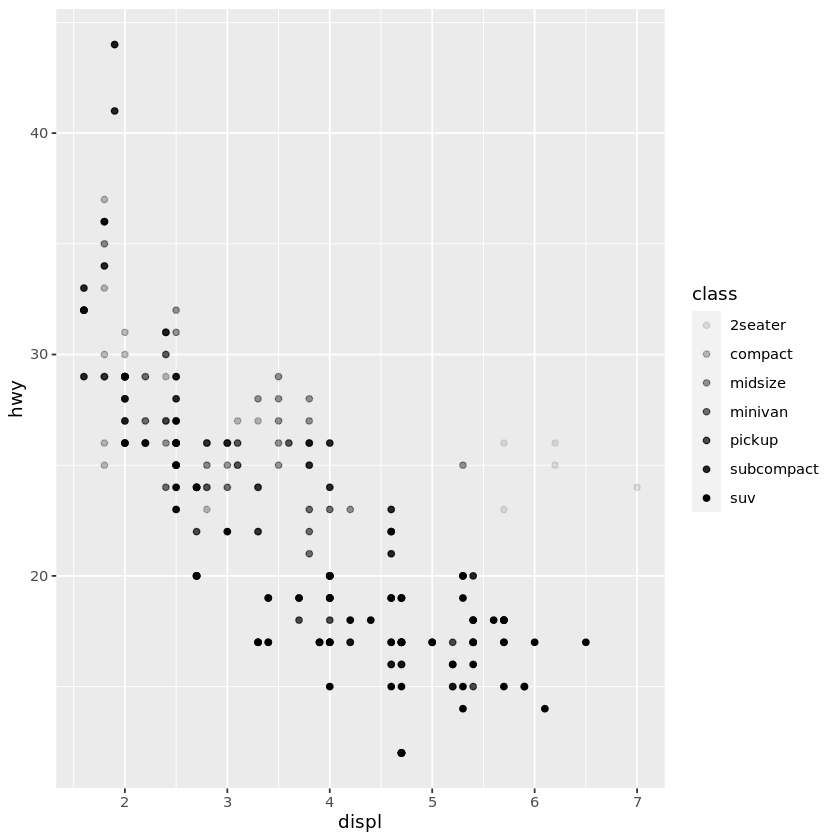

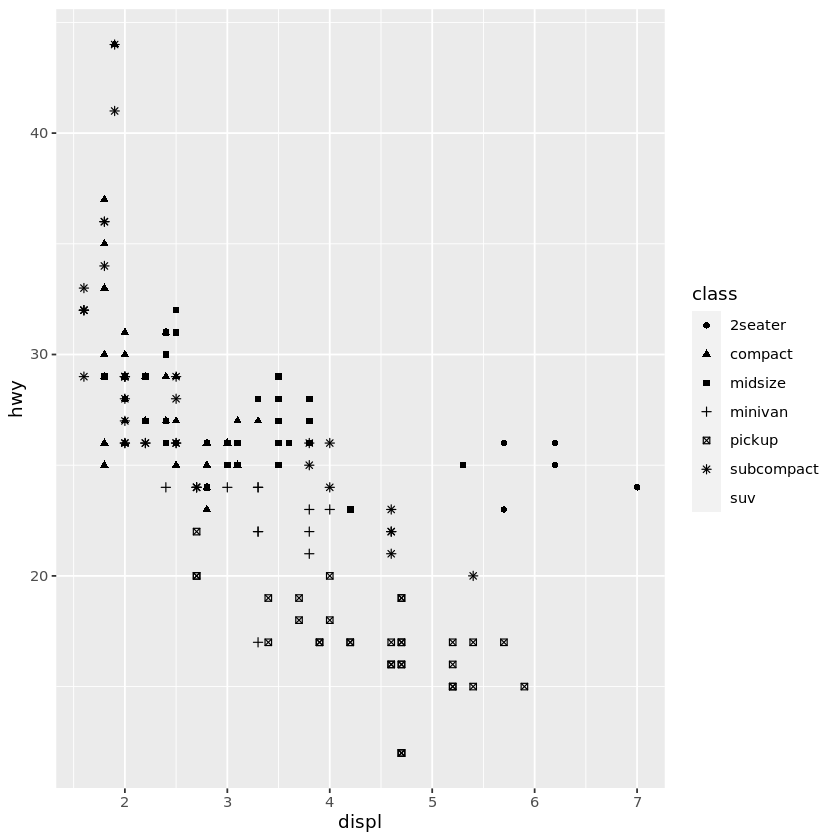

In [25]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, alpha = class))

ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy, shape = class))

You can also set the aesthetic properties outside of the `aes()` function manually, if you don't want the property to be based on a column in the data. For example, we can make all of the points in our plot blue:

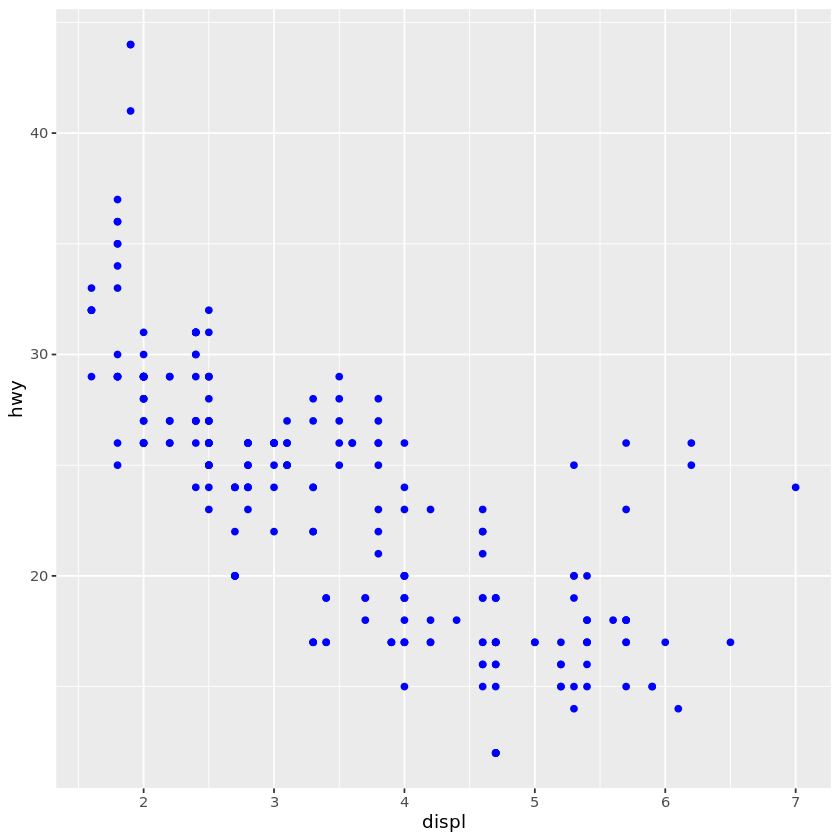

In [15]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), color = "blue")

What went wrong with the plot below? Why aren't the points blue when we tried to manually set the color property?

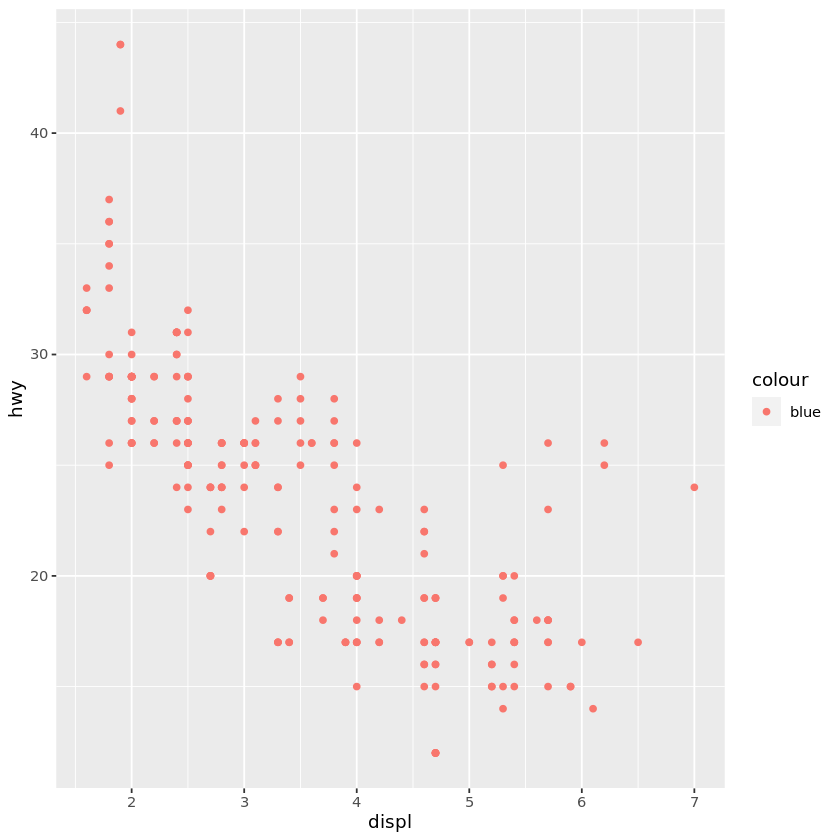

In [17]:
ggplot(data = mpg) +
  geom_point(mapping = aes(x = displ, y = hwy, color = "blue"))

## Common problems

Make sure that every ( is matched with a ) and every " is paired with another ". "Unexpected end of input" means that you need to finish the line of code. 

In [19]:
ggplot(data = mpg) +

ERROR: Error in parse(text = x, srcfile = src): <text>:2:0: unexpected end of input
1: ggplot(data = mpg) +
   ^


One common problem when creating ggplot2 graphics is to put the + in the wrong place: it has to come at the end of the line, not the start. In other words, make sure you haven’t accidentally written code like this:

ggplot(data = mpg) 
+ geom_point(mapping = aes(x = displ, y = hwy))

## Resources
Typing ? before a function or package displays a README about it

In [21]:
?ggplot()

ggplot {ggplot2},R Documentation
data,"Default dataset to use for plot. If not already a data.frame, will be converted to one by fortify(). If not specified, must be supplied in each layer added to the plot."
mapping,"Default list of aesthetic mappings to use for plot. If not specified, must be supplied in each layer added to the plot."
...,Other arguments passed on to methods. Not currently used.
environment,DEPRECATED. Used prior to tidy evaluation.


In [22]:
?aes()

aes {ggplot2},R Documentation
"x, y, ...","List of name-value pairs in the form aesthetic = variable describing which variables in the layer data should be mapped to which aesthetics used by the paired geom/stat. The expression variable is evaluated within the layer data, so there is no need to refer to the original dataset (i.e., use ggplot(df, aes(variable)) instead of ggplot(df, aes(df$variable))). The names for x and y aesthetics are typically omitted because they are so common; all other aesthetics must be named."


Google is your friend, especially when it points to these websites: [Stack overflow](https://stackoverflow.com/), [Biostars](www.biostars.org)

## Geometric objects

ggplot2 plots use a different visual object to represent the data. In ggplot2 syntax, we say that they use different "**geoms**".

A **geom** is the geometrical object that a plot uses to represent data. People often describe plots by the type of geom that the plot uses. For example, bar charts use bar geoms, line charts use line geoms, boxplots use boxplot geoms, and scatterplots use the point geom. 

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



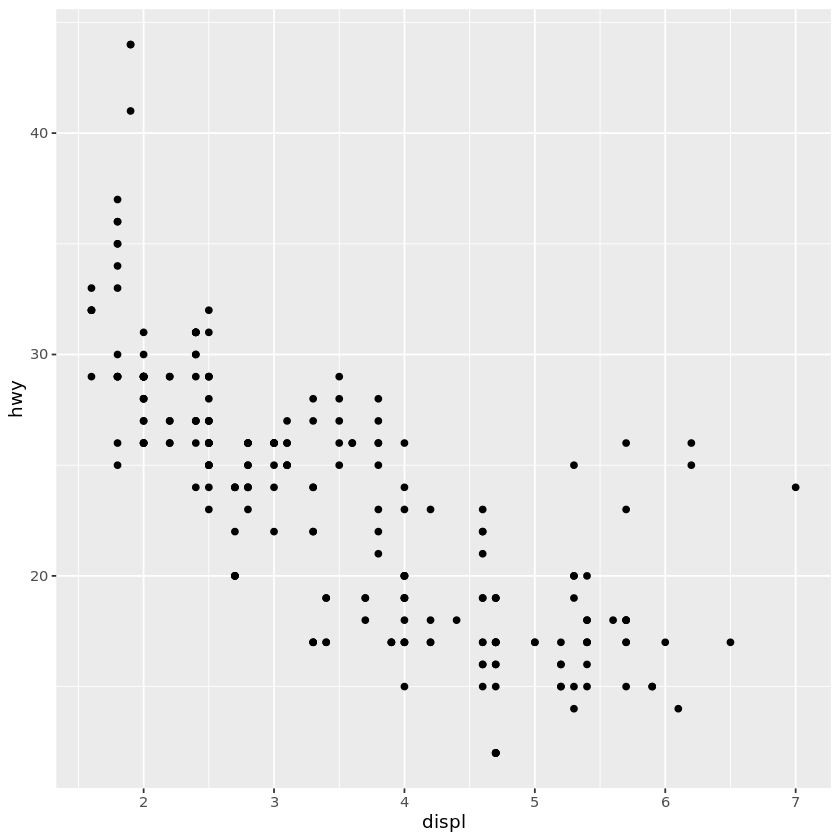

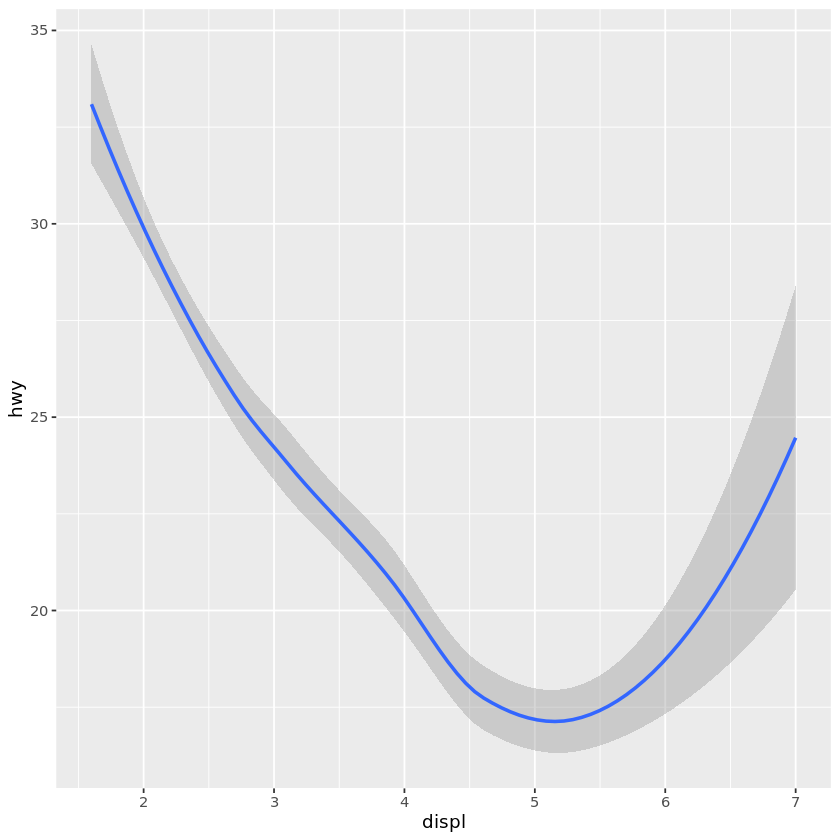

In [24]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy))

ggplot(data = mpg) + 
  geom_smooth(mapping = aes(x = displ, y = hwy))

You can display multiple **geoms** in the same plot by adding multiple **geom** functions:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



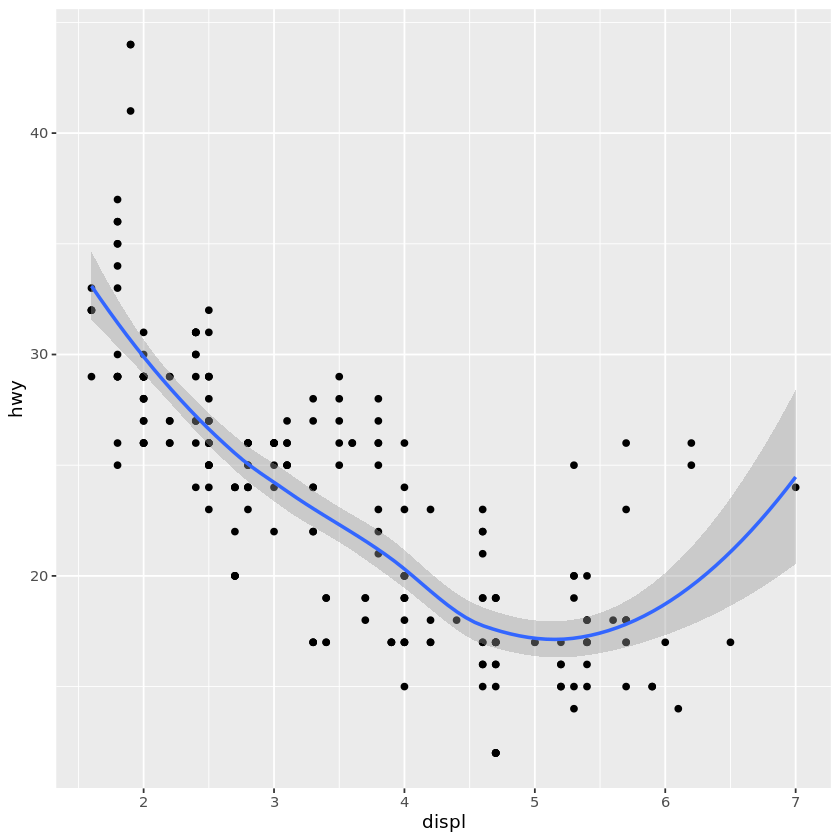

In [26]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy)) +
  geom_smooth(mapping = aes(x = displ, y = hwy))

Avoid repetition in code and keep it cleaner by passing a set of mappings to ggplot() to begin with:

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



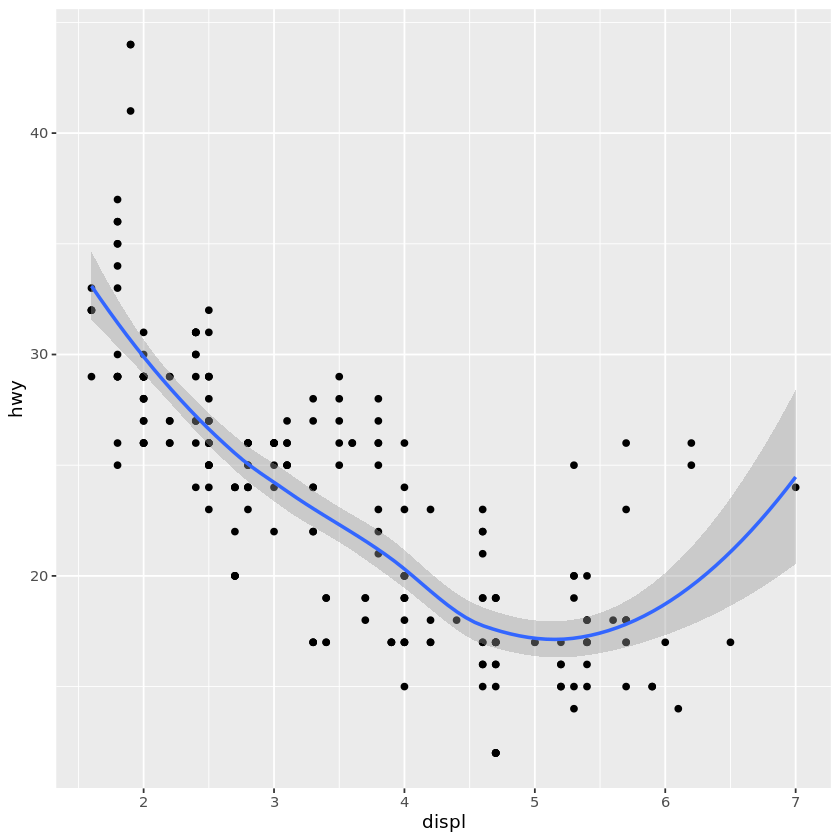

In [27]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point() + 
  geom_smooth()

If you place mappings in a geom function, ggplot2 will treat them as local mappings for the layer. It will use these mappings to extend or overwrite the global mappings for that layer only. This makes it possible to display different aesthetics in different layers.

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



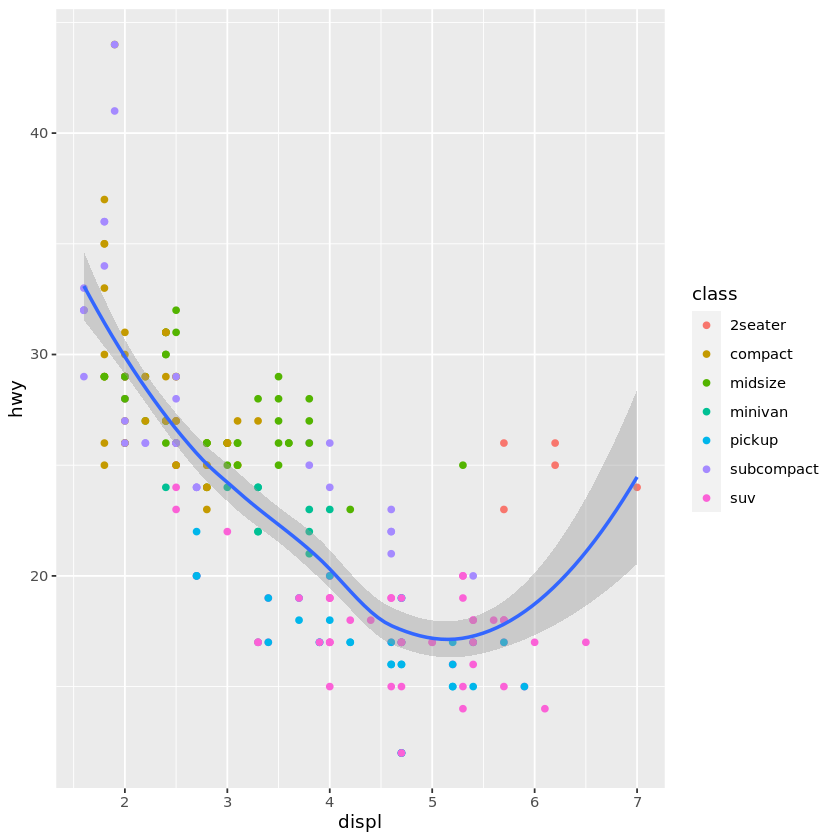

In [28]:
ggplot(data = mpg, mapping = aes(x = displ, y = hwy)) + 
  geom_point(mapping = aes(color = class)) + 
  geom_smooth()

## Statistical transformations

Many graphs, like scatterplots, plot the raw values of your dataset. Other graphs, like bar charts, calculate new values to plot:
- bar charts, histograms, and frequency polygons bin your data and then plot bin counts, the number of points that fall in each bin.
- smoothers fit a model to your data and then plot predictions from the model.
- boxplots compute a robust summary of the distribution and then display a specially formatted box.

The algorithm used to calculate new values for a graph is called a stat, short for statistical transformation

In [31]:
head(diamonds) # another dataset included in tidyverse

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48


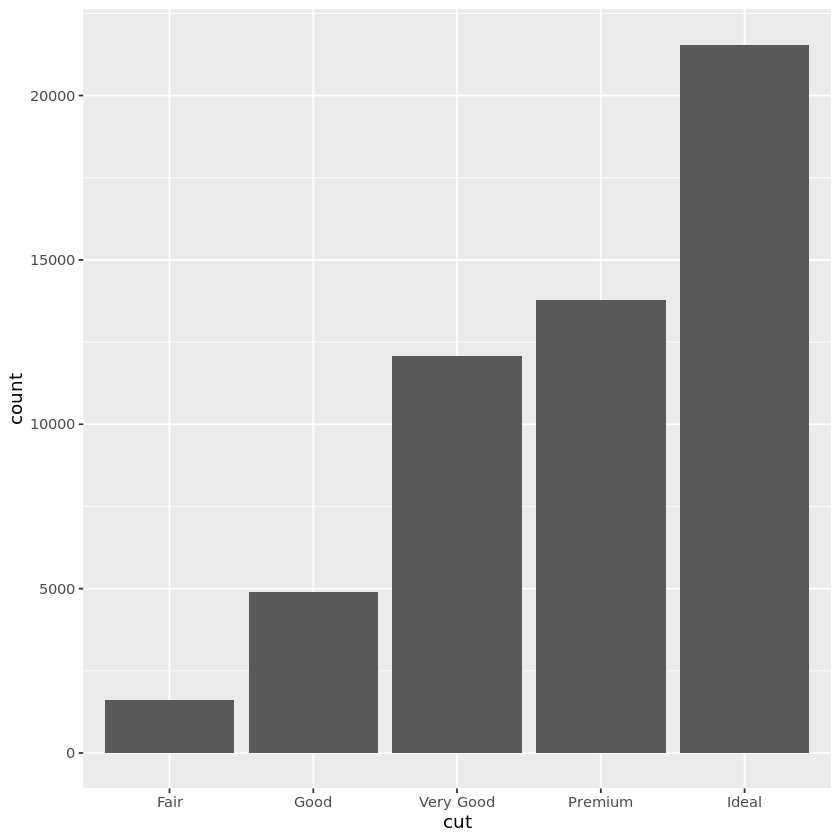

In [29]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut))

You might want to override the default mapping from transformed variables to aesthetics. For example, you might want to display a bar chart of proportion, rather than count:

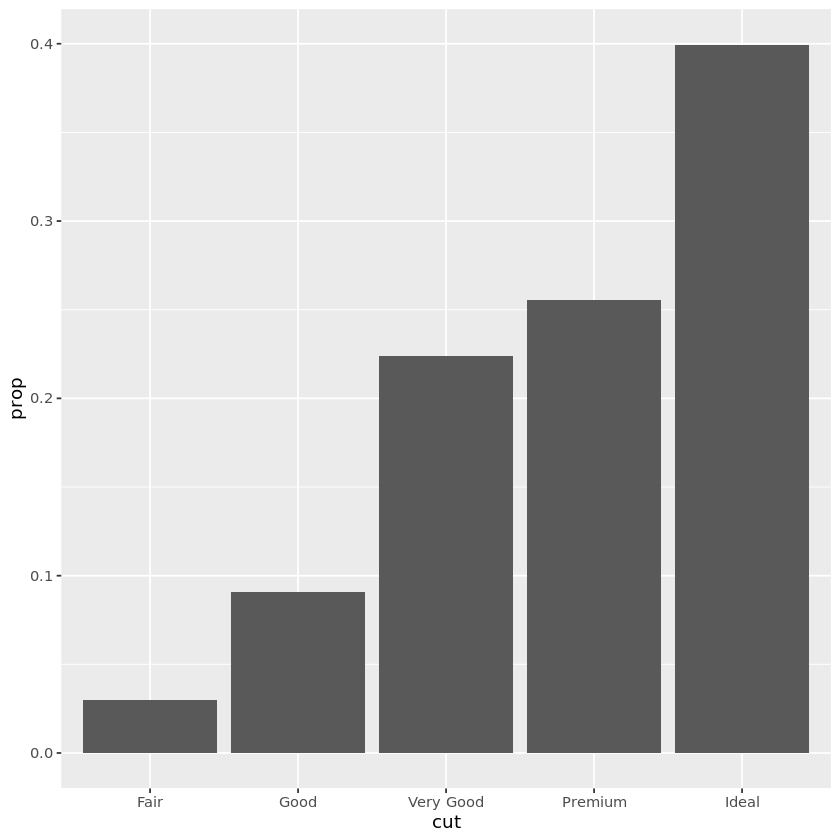

In [33]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, y = stat(prop), group = 1))

## Position adjustments

 You can colour a bar chart using either the `color` aesthetic, or, more usefully, `fill`:

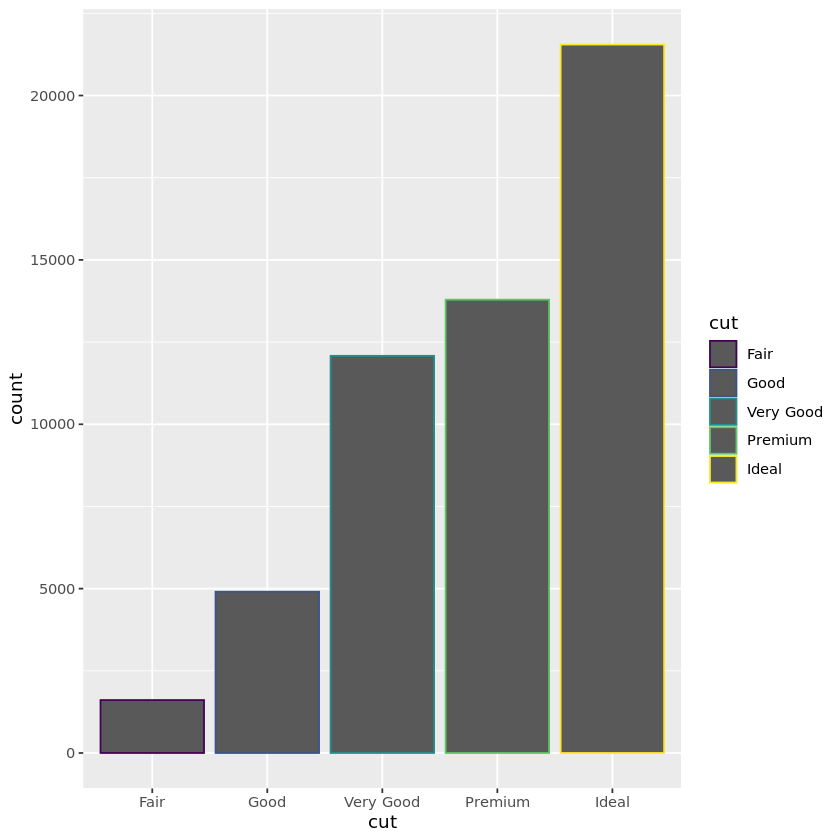

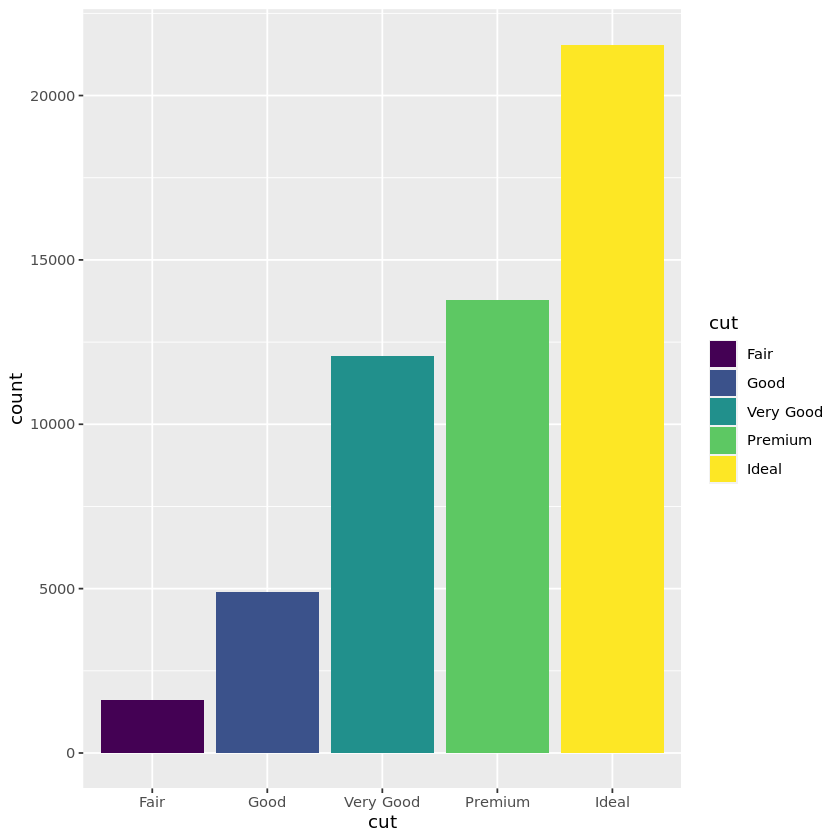

In [32]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, colour = cut))
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = cut))

Like using `color=` in the `aes()` function to display an additional variable in scatter plot, `fill=` can map the fill aesthetic to another variable, like clarity.

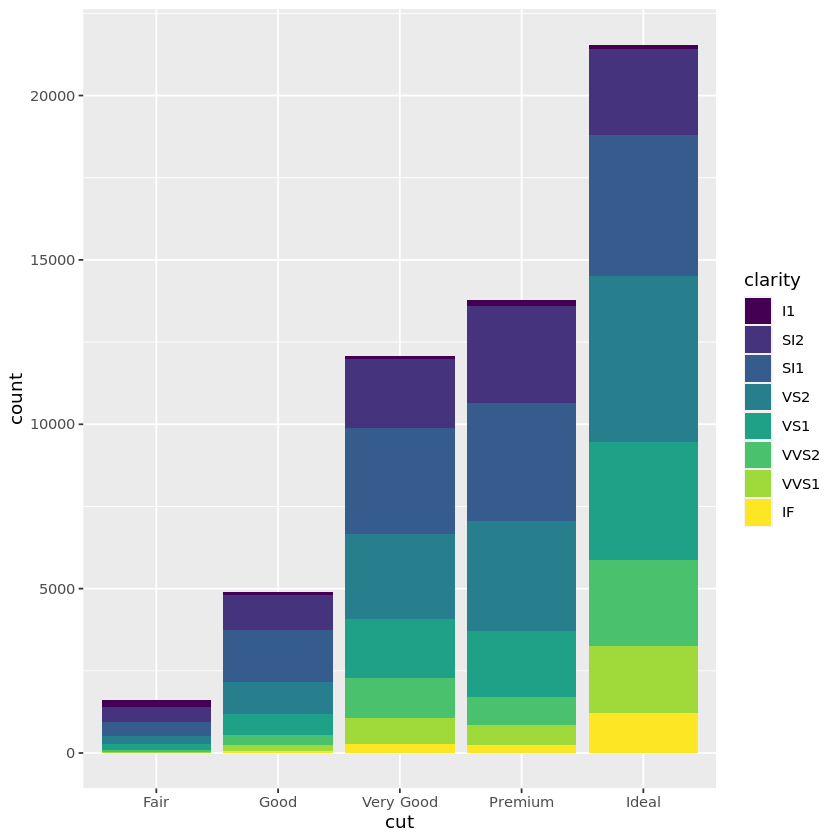

In [34]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity))

`position = "fill"` works like stacking, but makes each set of stacked bars the same height. This makes it easier to compare proportions across groups.

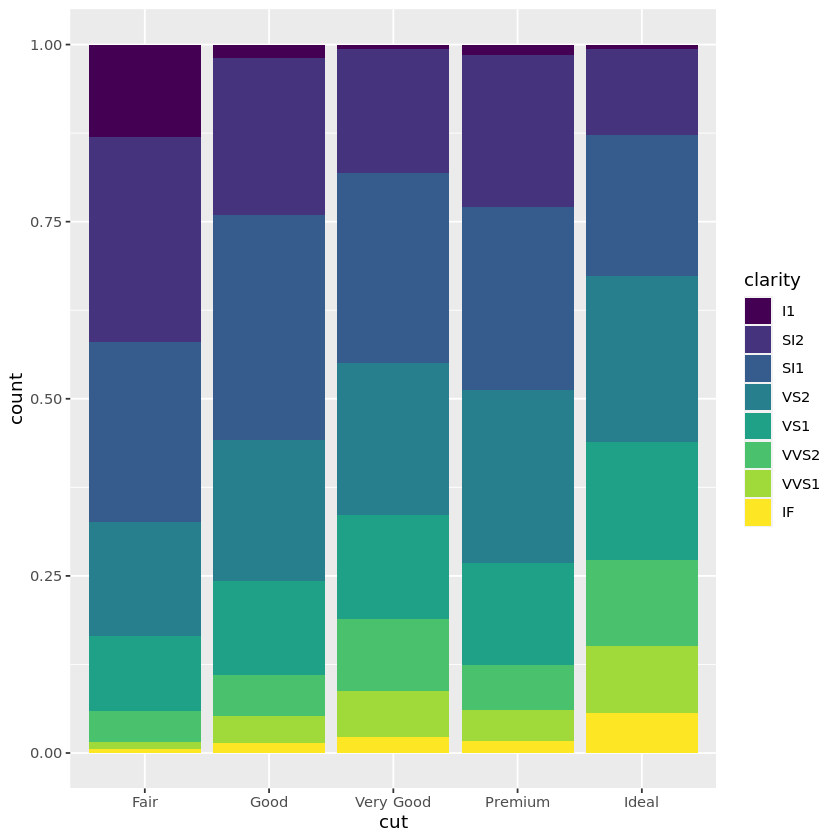

In [35]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "fill")

`position = "dodge"` places overlapping objects directly beside one another. This makes it easier to compare individual values.

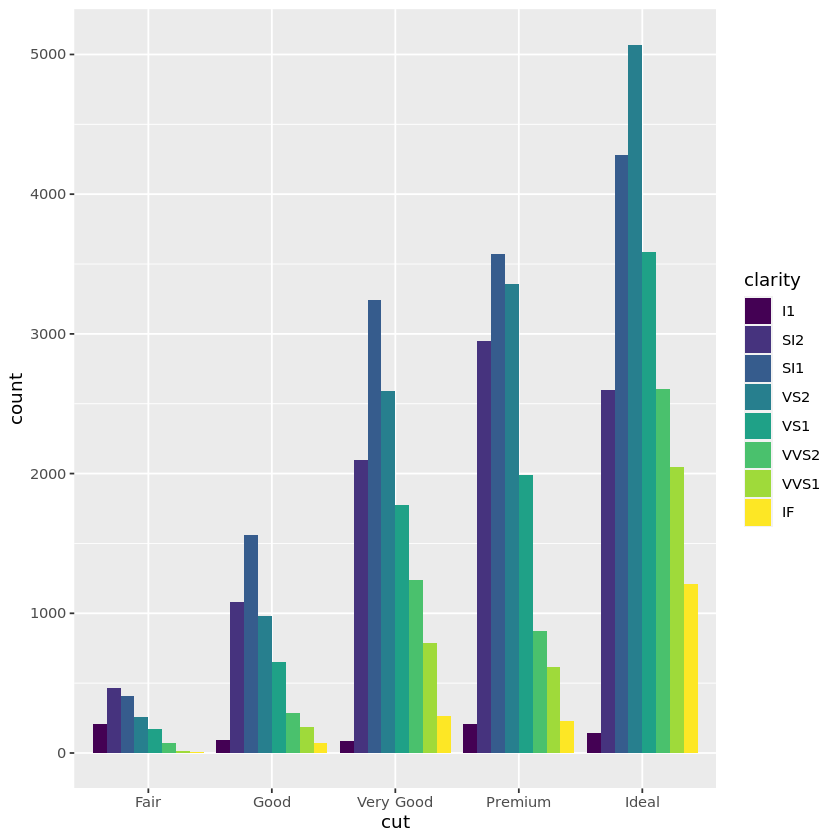

In [36]:
ggplot(data = diamonds) + 
  geom_bar(mapping = aes(x = cut, fill = clarity), position = "dodge")

`position = "jitter"` adds a small amount of random noise to each point. This spreads the points out because no two points are likely to receive the same amount of random noise.

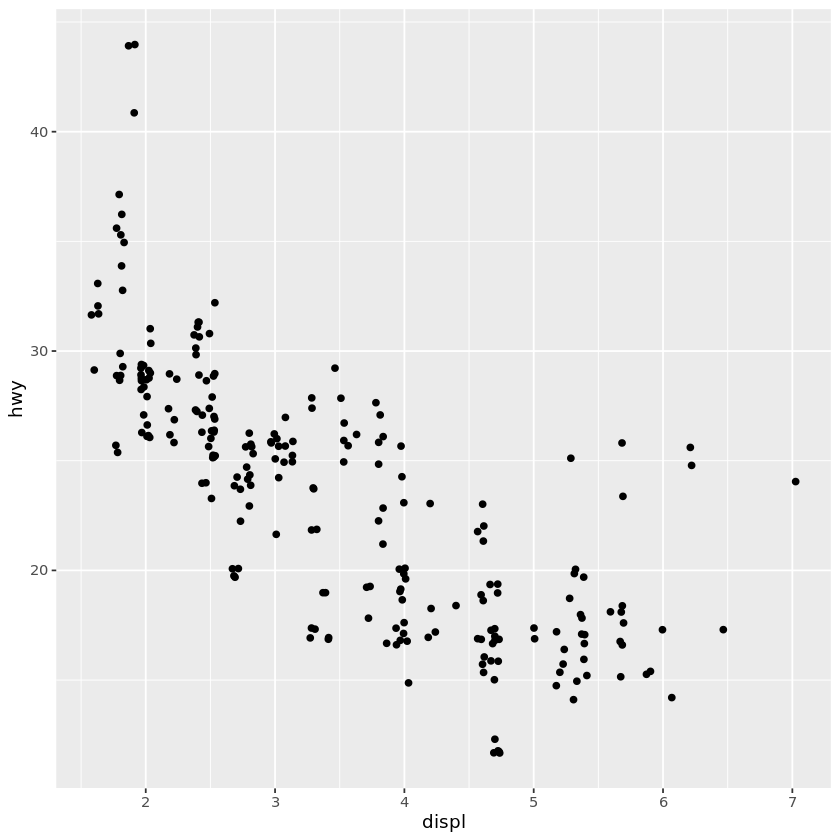

In [37]:
ggplot(data = mpg) + 
  geom_point(mapping = aes(x = displ, y = hwy), position = "jitter")

## Coordinate systems

`coord_flip()` switches the x and y axes. This is useful (for example), if you want horizontal boxplots. It’s also useful for long labels: it’s hard to get them to fit without overlapping on the x-axis.

There are also built-in functions for scaling continuous data via `scale_x_continuous(trans = 'log2')` and `scale_y_continuous(trans = 'log2')`, where `trans` can be 'log2', 'log10', or 'sqrt' (not shown).

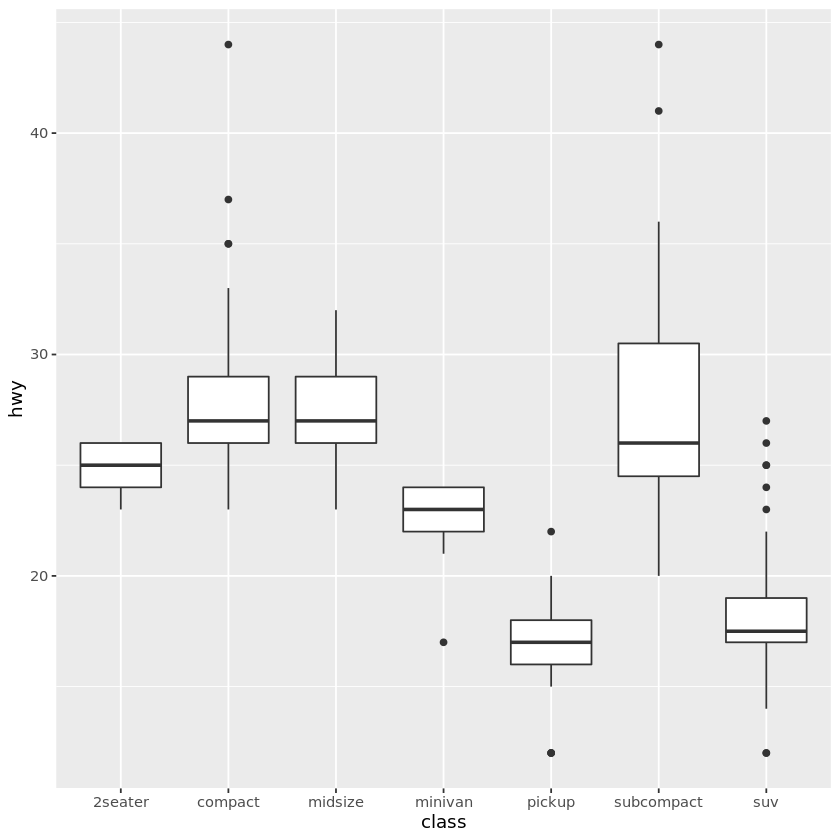

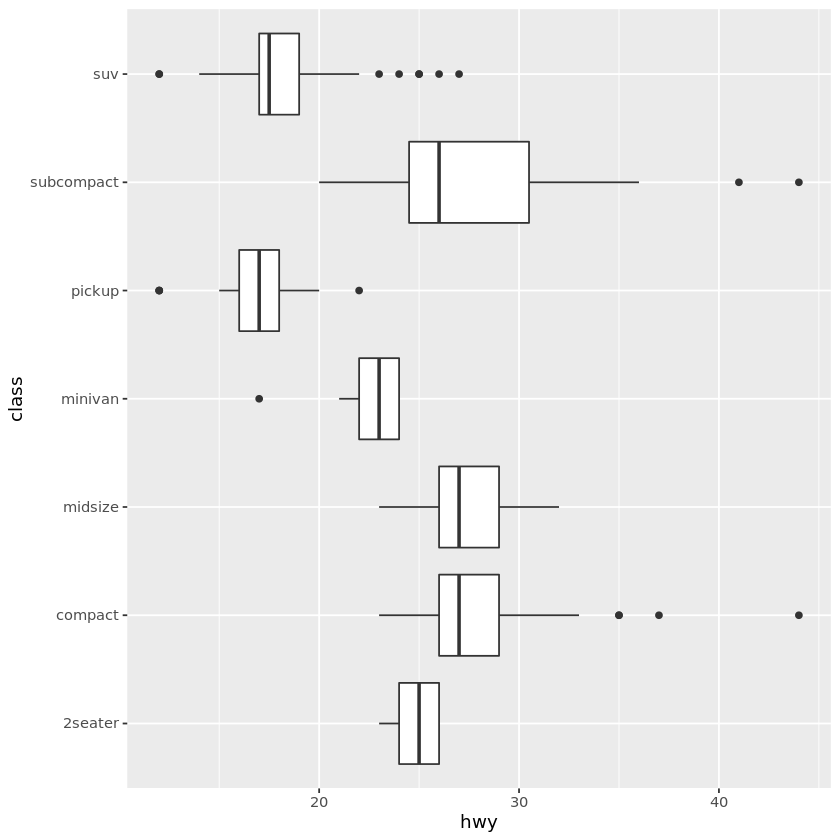

In [40]:
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot()
ggplot(data = mpg, mapping = aes(x = class, y = hwy)) + 
  geom_boxplot() +
  coord_flip()

## Coding basics

You can do regular math in R. Either `=` or `<-` can be used to assign variables. Variables persist in Jupyter notebooks until the session is canceled or the kernel is disabled for some reason. The downside to Jupyter notebooks is that you can't "see" all the variables you have in a particular environment (unlike RStudio), so staying organized is important.

In [48]:
x = 2

In [49]:
x * 10

[1] 20

Object names must start with a letter, and can only contain letters, numbers, `_` and `.`. You want your object names to be descriptive, so you’ll need a convention for multiple words. We recommend `snake_case` where you separate lowercase words with `_`.

I also recommend `snake_case` when naming directories or files on HPC.

Calling functions:

`function_name(arg1 = val1, arg2 = val2, ...)`

In [57]:
# for example, we can call the head() function and specify the number of rows to display (the first argument, n = )
head(mpg, n = 10)
seq(1,10,2) # what does the seq() function do?
#?seq() # remember you can always ask with ?

manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
<chr>,<chr>,<dbl>,<int>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<chr>
audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact


[1] 1 3 5 7 9

## Data transformation